# This Notebook Explores the Data
Mainly to get the True/False violation category values. But also for curriosity.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
yelp_merged_df = pd.read_pickle('final_yelpd_df.pkl')
# Only consider places with at least 10 reviews
test_df = yelp_merged_df[yelp_merged_df['review_count']>=10]

## Part 1: Correlation Studies

<Axes: >

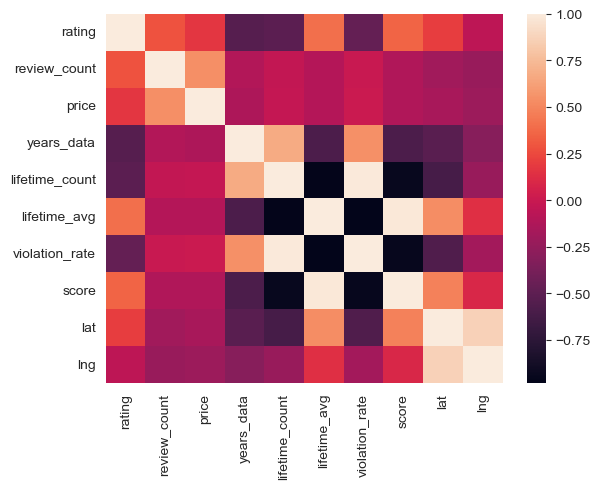

In [3]:
sns.heatmap(test_df.corr(numeric_only=True).corr())

<Axes: >

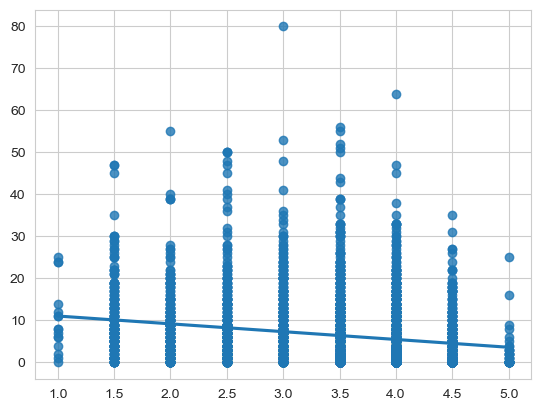

In [4]:
x = np.array(test_df['rating'].to_list())
y = np.array(test_df['lifetime_count'].to_list())
sns.regplot(x=x, y=y, ci=None)

<Axes: >

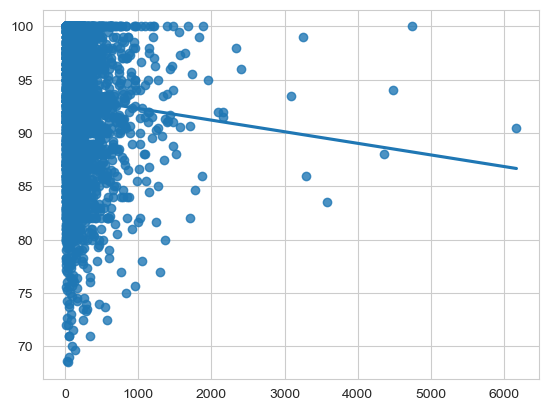

In [5]:
x = np.array(test_df['review_count'].to_list())
y = np.array(test_df['lifetime_avg'].to_list())
sns.regplot(x=x, y=y, ci=None)

<Axes: >

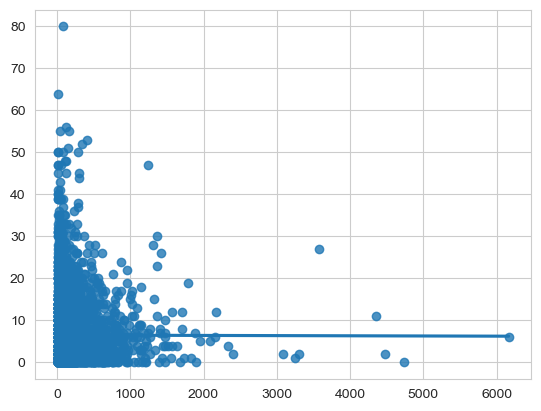

In [6]:
x = np.array(test_df['review_count'].to_list())
y = np.array(test_df['lifetime_count'].to_list())
sns.regplot(x=x, y=y, ci=None)

<Axes: >

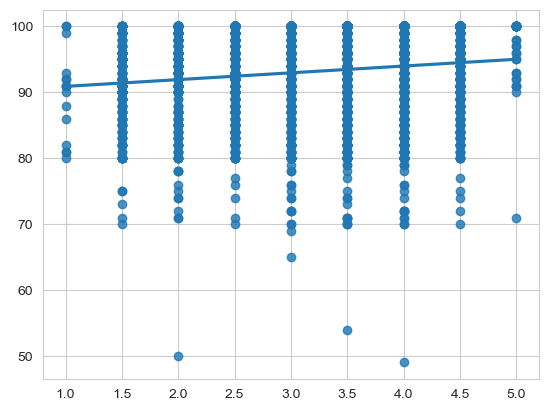

In [7]:
x = np.array(test_df['rating'].to_list())
y = np.array(test_df['score'].to_list())
sns.regplot(x=x, y=y, ci=None)

<Axes: >

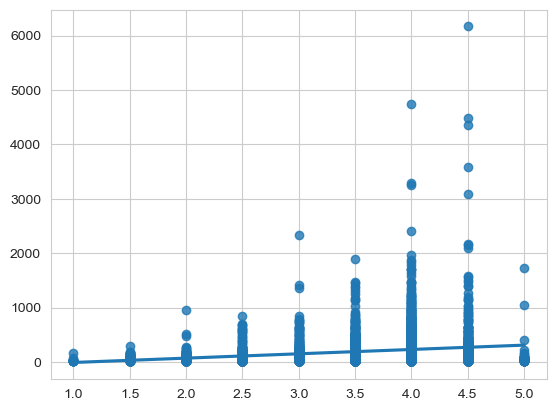

In [8]:
x = np.array(test_df['rating'].to_list())
y = np.array(test_df['review_count'].to_list())
sns.regplot(x=x, y=y, ci=None)

<Axes: >

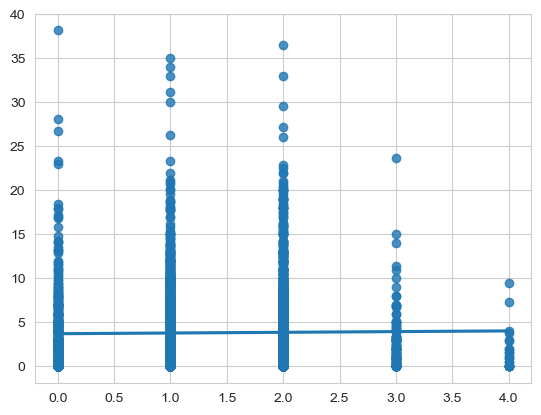

In [9]:
x = np.array(test_df['price'].to_list())
y = np.array(test_df['violation_rate'].to_list())
sns.regplot(x=x, y=y, ci=None)

## Part 2: But it was good though
- Rating >= 4.0
- Amongst the top 15% most reviewed places.
- Sorted by highest non-compliance rate.

In [10]:
p2_df = test_df[(test_df['review_count'] >= test_df.quantile(0.85, axis=0, numeric_only=True)['review_count']) &
        (test_df['rating'] >=4.0) & (test_df['lifetime_count'] >= 6)].sort_values('violation_rate', ascending=False)
p2_df

,dph_id,yelp_id,rating,review_count,img_url,yelp_name,price,violations,years_data,lifetime_count,...,lifetime_avg,violation_rate,map_add,name,score,date,lat,lng,place_id,types
1273,Nzk1NzQ2NA==,7CvyE0cLTzEzivSEdDAbMQ,4.0,1239,https://s3-media4.fl.yelpcdn.com/bphoto/J2a7WO...,Milk & Honey Restaurant,2,"[1-2A, 1-2A, 1-2B, 4-2B, 11A, 13A, 13A, 16A, 1...",2.389041,47,...,81.666667,19.673165,"5495 CASCADE RD STE 100, ATLANTA, GA 30331",Milk & Honey,85,01-31-2023,33.731884,-84.567217,ChIJ9f-vIwMf9YgR3GLZfVs86rg,[subpremise]
3522,MzEzNTM4MQ==,6wGHem2o7migh4syWmmB8A,4.0,548,https://s3-media3.fl.yelpcdn.com/bphoto/I4s_44...,Ginya Izakaya,2,"[6-2, 17C, 2-1B, 2-2D, 2-2D, 6-1A, 11A, 13A, 1...",0.057534,19,...,73.666667,19.000000,"1700 NORTHSIDE DR STE A-6, ATLANTA, GA 30318",Ginya Izakaya,95,03-17-2023,33.800570,-84.408488,ChIJYSEXGeME9YgRkx87G8UOLF4,"[establishment, food, point_of_interest, resta..."
4145,MjQxOTY1NQ==,_BNuP4qFCrUxBt2dGpUMaA,4.5,533,https://s3-media3.fl.yelpcdn.com/bphoto/7_ZOkN...,Baraka Shawarma,2,"[1-2A, 11A, 14D, 15A, 15A, 15B, 11A, 15A, 15A,...",1.027397,18,...,85.666667,17.520000,"68 WALTON ST, ATLANTA, GA 30303",Baraka Shawarma,88,04-01-2022,33.756341,-84.390891,ChIJq6q6LIcD9YgRrRRP-7S_xwU,"[establishment, food, point_of_interest, resta..."
3839,ODg2MjE0,qS2Gg7_FH8iHFiorOVd7hg,4.0,831,https://s3-media1.fl.yelpcdn.com/bphoto/dGJg82...,Pasta Da Pulcinella,2,"[6-1A, 13A, 16A, 17C, 18, 1-2B, 2-2D, 4-2A, 4-...",0.019178,16,...,75.000000,16.000000,"1123 PEACHTREE WALK, ATLANTA, GA 30309",Pasta Da Pulcinella,90,12-14-2022,33.784893,-84.388059,ChIJgz1RsFwE9YgRkbEiAabEAhw,"[establishment, food, point_of_interest, resta..."
542,MTIyOTUzODY=,ZDWMxsNC3ChNPvfhKuf9Jw,4.0,387,https://s3-media2.fl.yelpcdn.com/bphoto/ZCSDOm...,Valenza,2,"[6-1A, 2-2D, 2-2D, 4-1A, 4-2B, 6-1A, 13A, 18, ...",1.356164,21,...,80.500000,15.484848,"1441 DRESDEN DRIVE, SUITE 100, ATLANTA, GA 30319",VALENZA-VERO RESTAURANT,89,04-18-2022,33.860690,-84.330088,ChIJYcrkjpYI9YgRFb-eEu1OH9Y,[subpremise]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,ODg3ODIz,1i63faxXI1TQ7pNlLp3IPQ,4.0,1474,https://s3-media4.fl.yelpcdn.com/bphoto/A8wfrO...,Cypress Street Pint & Plate,2,"[12A, 17C, 6-1A, 15C, 17C, 18]",2.419178,6,...,91.000000,2.480181,"817 WEST PEACHTREE ST, ATLANTA, GA 30308",Cypress Street Pint And Plate,96,03-16-2023,33.777329,-84.386142,ChIJweczQWYE9YgRvtwgBTj9cUU,"[bar, cafe, establishment, food, meal_delivery..."
3770,ODgzMzMx,AUV7Ocno9T8_qPlFeRSziA,4.0,1094,https://s3-media1.fl.yelpcdn.com/bphoto/FIX6nm...,Ted's Montana Grill - Luckie Street,3,"[15A, 4-2B, 6-1A, 4-2A, 11D, 15A]",2.463014,6,...,94.500000,2.436040,"133 LUCKIE ST, ATLANTA, GA 30303",Ted's Montana Grill,99,01-06-2023,33.758640,-84.390491,ChIJg_jPqXgE9YgR3h4h8xO0Qfs,"[establishment, food, point_of_interest, resta..."
3764,MTMyODc4MQ==,jh07n3CFoc8gskZ8F-2g9w,4.0,819,https://s3-media3.fl.yelpcdn.com/bphoto/qlV9a8...,Farm Burger - Buckhead,2,"[6-1A, 10D, 2-1B, 2-2D, 14B, 14D]",2.487671,6,...,90.666667,2.411894,"3365 PIEDMONT RD STE 1120, ATLANTA, GA 30305",Farm Burger,86,01-09-2023,33.847325,-84.372752,ChIJj_FNgl8P9YgR4d8PH9gUbpg,[subpremise]
1000,OTQ4NTEwMg==,c_CmgUFycE45_tSN22FrVA,4.0,765,https://s3-media1.fl.yelpcdn.com/bphoto/jn3Yfy...,Gochas Breakfast Bar | Cascade,2,"[2-2D, 4-2A, 6-1A, 6-1B, 6-1A, 13A]",2.564384,6,...,90.333333,2.339744,"3695 CASCADE RD, ATLANTA, GA 30331",Gocha's Breakfast Bar LLC,96,03-08-2023,33.724976,-84.508373,ChIJKz2p3L0d9YgRmS6Jk7Jiq_M,"[establishment, food, point_of_interest, resta..."


## Part 3: Fuck it
- Rating <= 3.0
- But manages to be in top the 25% of the most reviewed places

In [11]:
p3_df = test_df[(test_df['review_count'] >= test_df.quantile(0.75, axis=0, numeric_only=True)['review_count']) &
        (test_df['rating'] <= 3.0) & (test_df['lifetime_count'] >= 3)].sort_values('violation_rate', ascending=False)
p3_df

,dph_id,yelp_id,rating,review_count,img_url,yelp_name,price,violations,years_data,lifetime_count,...,lifetime_avg,violation_rate,map_add,name,score,date,lat,lng,place_id,types
1928,MTIyODAxMzY=,i2hFzMk8cRfh5lZh6WuMyQ,3.0,405,https://s3-media2.fl.yelpcdn.com/bphoto/whXTgK...,Johnny's Chicken and Waffles,2,"[11C, 12B, 12C, 18, 1-2A, 1-2B, 6-1A, 6-1B, 11...",1.791781,53,...,83.142857,29.579511,"3725 MAIN ST, ATLANTA, GA 30349",Johnnys Chicken and Waffles,91,10-07-2022,33.653623,-84.449736,ChIJ42Hw-R_j9IgR8hH1fZkWcpo,"[establishment, food, point_of_interest, resta..."
3889,MTI3NzIzMTA=,_O9dQrC0gx9k7TW8WOKJMw,2.0,217,https://s3-media4.fl.yelpcdn.com/bphoto/SbeOB5...,Ruby Tuesday,2,"[2-1B, 2-2D, 2-2D, 4-2A, 4-2B, 15C, 17C, 2-2B,...",1.279452,27,...,80.500000,21.102784,"1230 VIRGINIA AVE, ATLANTA, GA 30344",Ruby Tuesday,80,11-28-2022,33.658595,-84.429420,ChIJr2nky0_99IgRlCBJdss0g7o,"[establishment, food, point_of_interest, resta..."
1326,MTIyNzM4MTc=,lt-kIiOnSGIPue8FeyX6tg,2.5,280,https://s3-media3.fl.yelpcdn.com/bphoto/QjyabV...,Kiku Japanese Steakhouse,2,"[2-2D, 6-1A, 6-1D, 12C, 17C, 17D, 2-2D, 4-2B, ...",2.400000,50,...,82.857143,20.833333,"3630 MARKETPLACE BLVD STE 850, ATLANTA, GA 30344",Ki-Ku Japenese Steakhouse & Sushi,83,01-26-2023,33.658522,-84.501848,ChIJAQB7QhPi9IgRVlNxmnVh31g,"[establishment, food, point_of_interest, resta..."
4227,MTI3NjgyMjM=,p98yPZZU8Ffm1HPOlu7u-g,3.0,226,https://s3-media1.fl.yelpcdn.com/bphoto/cGSgRY...,Little 5 Points Pizza,1,"[1-2B, 2-2D, 4-2B, 4-2B, 12A, 15A, 15B, 15C, 1...",0.287671,20,...,86.000000,20.000000,"422 SEMINOLE AVE NE, ATLANTA, GA 30307",Little 5 Points Pizza,80,07-29-2021,33.765720,-84.349491,ChIJz1U50KgG9YgRzYTYA5MkXPQ,[premise]
3847,MTI5ODIxMDI=,cGxBHIr1pQy70qjM5bd3ew,3.0,218,https://s3-media2.fl.yelpcdn.com/bphoto/llTLBc...,Atlantic Grill at Atlantic Station,2,"[4-2A, 4-2B, 4-2B, 6-1A, 6-2, 17C, 17C, 17C, 2...",0.150685,19,...,82.500000,19.000000,"264 19TH ST NW STE 2120, ATLANTA, GA 30363",Atlantic Grill LLC,82,12-12-2022,33.793284,-84.396813,ChIJd_Sz-vcE9YgRQ581uA93j0Y,"[bar, establishment, food, point_of_interest, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,MTIyOTYyNTc=,j8HjNcYWaMKDldD1wEf0hA,3.0,371,https://s3-media1.fl.yelpcdn.com/bphoto/crP7Pq...,Red and Green Brazilian Steakhouse,3,"[4-2B, 15C, 17D]",2.013699,3,...,95.500000,1.489796,"5979 BUFORD HIGHWAY STE B1, DORAVILLE, GA 30340",RED & GREEN BRAZILIAN STEAKHOUSE,100,12-13-2022,33.913416,-84.260995,ChIJycYmnVyn9YgR2pTSA3Jyivg,"[establishment, food, point_of_interest, resta..."
1709,ODg1NTQz,32vIEah4lvVuQxvo5pYgiA,2.5,543,https://s3-media1.fl.yelpcdn.com/bphoto/v2isBj...,Regal Atlantic Station,0,"[2-2E, 11D, 13A]",2.134247,3,...,96.666667,1.405648,"261 19TH ST NW, ATLANTA, GA 30363",Regal Cinemas Atlantic Station 16,100,11-18-2022,33.793452,-84.396121,ChIJIY2TC_gE9YgR5qf5-aKuolk,"[establishment, movie_theater, point_of_interest]"
837,ODc1OTQ5,NHy6-lY_P6Q6_c8Fs5cTVQ,3.0,346,https://s3-media4.fl.yelpcdn.com/bphoto/0f3V19...,Johnny's Hideaway,2,"[4-2B, 16B, 17D]",2.369863,3,...,96.500000,1.265896,"3771 ROSWELL RD NE, ATLANTA, GA 30342",Johnny's Hideaway,96,03-24-2023,33.857753,-84.380878,ChIJzxxs-2UP9YgR7Y93MR6bS8o,"[bar, establishment, food, night_club, point_o..."
1476,ODc5Njg3,SuOXDHSpj7aML05XABusUw,3.0,288,https://s3-media1.fl.yelpcdn.com/bphoto/l8LMAw...,Dreamland BBQ,2,"[4-2B, 6-1A, 18]",2.421918,3,...,94.666667,1.238688,"10730 ALPHARETTA HWY, ROSWELL, GA 30076",Dreamland B.B.Q,96,01-06-2023,34.041455,-84.342841,ChIJtzkXlbx09YgR0llIVcmf5u0,"[establishment, food, point_of_interest, resta..."


## Part 4: As good as it gets
- Great Reviews: Rating >= 4.0
- Good Business: Review count in top quartile
- No Tricks: At least 1 year of data
- Lowest quartile non-compliance rate

In [12]:
p4_df = test_df[(test_df['review_count'] >= test_df.quantile(0.85, axis=0, numeric_only=True)['review_count']) &
        (test_df['rating'] >= 4.0) & (test_df['years_data'] >= 1.0)].sort_values('violation_rate', ascending=True)
p4_df

,dph_id,yelp_id,rating,review_count,img_url,yelp_name,price,violations,years_data,lifetime_count,...,lifetime_avg,violation_rate,map_add,name,score,date,lat,lng,place_id,types
1516,MzEyOTY0Nw==,bAybZImsqUwinMrzZlzVIQ,4.0,1477,https://s3-media3.fl.yelpcdn.com/bphoto/dT5GhC...,True Food Kitchen,2,[],2.476712,0,...,100.000000,0.000000,"3393 PEACHTREE RD, ATLANTA, GA 30326",True Food Kitchen Bar,100,12-29-2022,33.847652,-84.363745,ChIJc2vdMFYP9YgRu9vA5uVua1Y,"[establishment, food, point_of_interest, resta..."
939,MzEyODA3Mw==,GMpU7eW3Uf9b_zm1zFZLwQ,4.5,369,https://s3-media1.fl.yelpcdn.com/bphoto/LlZ9uN...,House of Hummus-Alpharetta,2,[],2.328767,0,...,100.000000,0.000000,"5950 NORTH POINT PKWY STE 127, ALPHARETTA, GA ...",House of Hummus,100,03-16-2023,34.049272,-84.281222,ChIJPR9DWW919YgR7ZR4C-FYbUQ,"[establishment, food, point_of_interest, resta..."
1093,ODgyMzg5,qLsMOFtSgTgqXhzW_ZRg7Q,4.0,695,https://s3-media4.fl.yelpcdn.com/bphoto/kyA2UZ...,Pappadeaux Seafood Kitchen,2,[],2.632877,0,...,100.000000,0.000000,"10795 DAVIS DR, ALPHARETTA, GA 30009",Pappadeaux,100,02-22-2023,34.041609,-84.311715,ChIJnYuygN909YgRzJwCKkKvz0M,"[establishment, food, point_of_interest, resta..."
2248,Nzk1NDEwOQ==,cuvZh4F9zrexeOKC0W0_lw,4.0,502,https://s3-media2.fl.yelpcdn.com/bphoto/vUDM1N...,Grand China Restaurant,2,[],1.838356,0,...,100.000000,0.000000,"2905 PEACHTREE RD NE, ATLANTA, GA 30305",Grand China Restaurant Bar,100,06-01-2022,33.834178,-84.382325,ChIJ2YnRH44F9YgRUlnP8LtcE88,"[establishment, food, point_of_interest, resta..."
2314,MzEzMjY5OA==,1VAX8KygRWcloSuv5x5o5A,4.0,1100,https://s3-media4.fl.yelpcdn.com/bphoto/meB4fF...,Superica,2,[],1.572603,0,...,100.000000,0.000000,"99 KROG ST STE C, ATLANTA, GA 30307",Superica Bar,100,03-28-2022,33.756777,-84.363981,Eic5OSBLcm9nIFN0IE5FIGMsIEF0bGFudGEsIEdBIDMwMz...,[subpremise]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,OTQ4Mzk1NA==,UG6_dVkv1I5AV7NS3CG6Kg,4.0,518,https://s3-media1.fl.yelpcdn.com/bphoto/tM5Xqk...,Cultivate Food and Coffee,2,"[2-2D, 13A, 14A, 2-2D, 4-2B, 4-2B, 10D, 12A, 1...",2.117808,28,...,86.000000,13.221216,"1952 HOWELL MILL RD STE 200, ATLANTA, GA 30318",Cultivate Food & Coffee,92,08-19-2022,33.807856,-84.412932,ChIJnYPCXQUF9YgRpR4IB3nLi1w,"[cafe, establishment, food, meal_takeaway, poi..."
3673,ODg0ODE2,a-ipadXW98VYy_wpbul_tA,4.0,763,https://s3-media3.fl.yelpcdn.com/bphoto/4CmZxY...,Thumbs Up Diner,2,"[4-1A, 4-2A, 4-2B, 4-2B, 15C, 17C, 17D, 18, 5-...",1.539726,21,...,77.000000,13.638790,"1617 WHITE WAY, EAST POINT, GA 30344",Thumbs Up Diner,81,02-01-2023,33.678876,-84.441705,ChIJSax0vVMd9YgRCRtbsuRj3to,"[establishment, food, point_of_interest, resta..."
542,MTIyOTUzODY=,ZDWMxsNC3ChNPvfhKuf9Jw,4.0,387,https://s3-media2.fl.yelpcdn.com/bphoto/ZCSDOm...,Valenza,2,"[6-1A, 2-2D, 2-2D, 4-1A, 4-2B, 6-1A, 13A, 18, ...",1.356164,21,...,80.500000,15.484848,"1441 DRESDEN DRIVE, SUITE 100, ATLANTA, GA 30319",VALENZA-VERO RESTAURANT,89,04-18-2022,33.860690,-84.330088,ChIJYcrkjpYI9YgRFb-eEu1OH9Y,[subpremise]
4145,MjQxOTY1NQ==,_BNuP4qFCrUxBt2dGpUMaA,4.5,533,https://s3-media3.fl.yelpcdn.com/bphoto/7_ZOkN...,Baraka Shawarma,2,"[1-2A, 11A, 14D, 15A, 15A, 15B, 11A, 15A, 15A,...",1.027397,18,...,85.666667,17.520000,"68 WALTON ST, ATLANTA, GA 30303",Baraka Shawarma,88,04-01-2022,33.756341,-84.390891,ChIJq6q6LIcD9YgRrRRP-7S_xwU,"[establishment, food, point_of_interest, resta..."


## Part 5: Terrible, Just Terrible
- The non-compliance hall of fame: the highest rates in town, period.

In [13]:
p5_df = test_df[test_df['violation_rate'] >= test_df.quantile(0.95, axis=0, numeric_only=True)['violation_rate']]\
    .sort_values('violation_rate', ascending=False)
p5_df

,dph_id,yelp_id,rating,review_count,img_url,yelp_name,price,violations,years_data,lifetime_count,...,lifetime_avg,violation_rate,map_add,name,score,date,lat,lng,place_id,types
223,MTIzMDE4MTM=,_ZtmNLHOaiMKVJIpiPQ_7g,2.0,18,https://s3-media2.fl.yelpcdn.com/bphoto/YODS1e...,Church's Chicken,0,"[12B, 17C, 15A, 15A, 15A, 15C, 17B, 17C, 17D, ...",1.021918,39,...,77.600000,38.163539,"6102 COVINGTON HWY, DECATUR, GA 30035",CHURCH'S CHICKEN,96,01-05-2023,33.723490,-84.168436,ChIJFUBkp2us9YgRzWwaewk9Bic,"[establishment, food, point_of_interest, resta..."
406,MTIyOTM5MjM=,5xAxTSF5nnvCotxWg_MhgA,2.0,161,https://s3-media3.fl.yelpcdn.com/bphoto/zDG5cB...,Kampai,2,"[15B, 18, 2-2D, 4-2A, 4-2B, 4-2B, 4-2B, 4-2B, ...",1.506849,55,...,74.500000,36.500000,"7105 STONECREST PKWY, SUITE 101 & 102, LITHONI...",KAMPAI SUSHI & STEAK,74,10-17-2022,33.697604,-84.091962,ChIJrambyYey9YgRwL3tKeOQBt0,"[establishment, food, point_of_interest, resta..."
471,MTIyOTgyMTU=,MrWSVNMbP3E1wD0Rf9S4Vw,3.5,94,https://s3-media3.fl.yelpcdn.com/bphoto/AqX6vA...,Fireside Jamaican Restaurant,1,"[2-2A, 2-2E, 4-2B, 4-2B, 6-1A, 6-1B, 6-2, 11C,...",0.873973,35,...,74.750000,35.000000,"7046 COVINGTON HWY, LITHONIA, GA 30038",FIRESIDE RESTAURANT,71,08-22-2022,33.717067,-84.130668,ChIJ87X8S7qt9YgRodkrHOpV_co,"[establishment, food, point_of_interest, resta..."
410,MTI3NjcwMzE=,xI5TDSk53VFmb-z9CiDlbw,4.5,12,https://s3-media4.fl.yelpcdn.com/bphoto/fEGTkd...,Touchdown Wings,1,"[17D, 17D, 2-2B, 4-2A, 6-2, 11A, 11C, 12A, 13A...",1.030137,35,...,79.000000,33.976064,"2079 S HAIRSTON RD STE D, DECATUR, GA 30035",FRESH TOUCHDOWN WINGS,75,10-17-2022,33.730573,-84.195880,ChIJESD7Juir9YgR8xhD4bo5t3o,"[establishment, food, point_of_interest, resta..."
2793,ODc2MzQ3,ZDqXUa-ZnoS4xqqtWc8KUg,4.0,167,https://s3-media1.fl.yelpcdn.com/bphoto/YNRZn1...,Moes and Joe's Tavern,2,"[6-1A, 6-1A, 6-2, 8-2B, 12A, 14A, 17C, 17D, 2-...",0.463014,33,...,76.400000,33.000000,"1033 NORTH HIGHLAND AVE NE, ATLANTA, GA 30306",Moe & Joe's,91,10-22-2020,33.782843,-84.354143,ChIJd-6YJ54G9YgRh2EApArhwWM,[subpremise]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,MTIzMDI1ODk=,OLVs0WeEOSj3cRke1DBs-A,3.5,123,https://s3-media3.fl.yelpcdn.com/bphoto/BsTmLd...,Spice House Lithonia,2,"[4-2B, 8-2B, 18, 4-2B, 12B, 12B, 4-2B, 6-2, 1-...",1.956164,24,...,82.500000,12.268908,"2617 PANOLA RD, LITHONIA, GA 30058",SPICE HOUSE,89,11-04-2022,33.713020,-84.167336,ChIJu89xs2es9YgRay89aMeiJzU,[premise]
922,ODg1OTgy,eoUdqNtYVBgJiJvvbFtX9Q,2.5,28,https://s3-media2.fl.yelpcdn.com/bphoto/vz3rzp...,Carri Fresh Jamican,1,"[4-1A, 6-2, 15C, 17C, 1-2B, 4-1A, 9-2, 15A, 15...",2.635616,32,...,75.250000,12.141372,"6810 - F SHANNON PKWY, UNION CITY, GA 30291",Carri-Fresh,81,03-17-2023,33.569507,-84.538828,ChIJE87I-bTm9IgRvq8CEG0n0VM,"[establishment, food, point_of_interest, resta..."
46,MTIzMDE4NDI=,GZaXyyc6Fx5vcXzcaHMgRg,1.5,54,https://s3-media2.fl.yelpcdn.com/bphoto/eC_8OG...,McDonald's,1,"[4-2A, 4-2B, 4-2B, 13A, 13A, 15C, 15C, 2-2D, 2...",2.482192,30,...,81.600000,12.086093,"3531 FLAT SHOALS RD, DECATUR, GA 30034",MCDONALD' S,92,03-16-2023,33.704269,-84.271629,ChIJDdVban8A9YgRYqRiuTcbadQ,"[cafe, establishment, food, point_of_interest,..."
3683,MTI4MzE2OQ==,lRpUhFu19ewmYNhM4ScHrg,2.5,10,https://s3-media2.fl.yelpcdn.com/bphoto/OCSQ8X...,American Deli,1,"[4-2B, 4-2B, 10D, 15C, 17D, 2-2A, 4-2A, 10D, 1...",2.317808,28,...,83.600000,12.080378,"1003 VIRGINIA AVE, HAPEVILLE, GA 30354",American Deli,89,01-31-2023,33.659429,-84.422396,ChIJM71PWEP99IgRM-pyLpeKxdQ,"[establishment, food, point_of_interest, resta..."


## Part 6: Fancy
- How did the most expensive places in Atlanta do?

In [14]:
p6_df = test_df[(test_df['price'] >= 3)].sort_values(['price','violation_rate'], ascending=[False, False])
p6_df

,dph_id,yelp_id,rating,review_count,img_url,yelp_name,price,violations,years_data,lifetime_count,...,lifetime_avg,violation_rate,map_add,name,score,date,lat,lng,place_id,types
1099,Nzk2MDc5Mg==,BhC_aojYzH4mGPG_pShEhA,3.5,36,https://s3-media4.fl.yelpcdn.com/bphoto/z_P3Xm...,Ben & Jerry’s,4,"[4-2B, 6-1A, 15C, 17A, 17D, 11D, 13A, 1-2A, 2-...",2.739726,26,...,85.8,9.490000,"312 N HIGHLAND AVE STE 312-B, ATLANTA, GA 30307",Ben & Jerry's,85,02-22-2023,33.763324,-84.357975,ChIJPaMe3QME9YgR9AtC0EgKoOw,"[bakery, establishment, food, point_of_interes..."
3822,ODc3MjY0,c02zdoOixfLRS0vxRZUAKg,4.0,14,https://s3-media2.fl.yelpcdn.com/bphoto/kBWRQE...,The Club At Chops,4,"[2-2D, 6-1A, 4-2A, 4-2B, 4-2B, 11D, 12A, 17C, 18]",1.221918,9,...,86.0,7.365471,"68 WEST PACES FERRY RD, ATLANTA, GA 30305",The Club At Chops,87,12-27-2022,33.839830,-84.381844,ChIJ01dhwo4F9YgRyv35vhu5k10,"[bar, establishment, food, point_of_interest, ..."
3587,MzEzNDQwMw==,flrsv0dum7T68jy7QSDRKw,4.5,776,https://s3-media3.fl.yelpcdn.com/bphoto/Ds_fsi...,Marcel,4,"[12C, 13A, 14C, 15C]",0.000000,4,...,94.0,4.000000,"1170 HOWELL MILL RD UNIT 108, ATLANTA, GA 30318",Marcel Restaurant,94,02-27-2023,33.785745,-84.412541,ChIJ91usCuwE9YgRP6FYPUrfhb0,"[establishment, food, point_of_interest, resta..."
3896,ODg2NjMy,z5zuvz9OD8S_-iNMPiqJNQ,4.0,980,https://s3-media3.fl.yelpcdn.com/bphoto/IIKE8R...,Kevin Rathbun Steak,4,"[4-2B, 6-2, 14B, 4-2B, 6-1A, 11A, 14B, 15C, 17D]",2.347945,9,...,85.5,3.833139,"154 KROG ST STE 200, ATLANTA, GA 30307",Kevin Rathbun Steak LLC,90,11-18-2022,33.759250,-84.363944,ChIJ8cCo6QcE9YgRlrqsWTsW-UM,"[bar, establishment, food, point_of_interest, ..."
3445,MTIyOTI2NTc=,IYKzedGE0pzSlGjUPcUy2g,4.0,369,https://s3-media1.fl.yelpcdn.com/bphoto/vT1aDw...,McKendrick's Steak House,4,"[4-2B, 15C, 17C]",0.000000,3,...,92.0,3.000000,"4505 ASHFORD DUNWOODY RD, ATLANTA, GA 30346",MCKENDRICK'S STEAKHOUSE,92,01-07-2021,33.924452,-84.335408,ChIJaY3FGl0J9YgRxyARFrvjqAM,"[bar, establishment, food, point_of_interest, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,MTI5NzY5NDY=,Pc294LUYeylMORj3zEuWGQ,3.5,178,https://s3-media3.fl.yelpcdn.com/bphoto/9QW6Il...,Prime,3,[],0.000000,0,...,100.0,0.000000,"3393 PEACHTREE RD NE, ATLANTA, GA 30326",Popeyes,100,03-08-2023,33.846726,-84.362420,ChIJ07us1FcP9YgReNjOn-VkSeQ,[premise]
4170,Nzk1Nzg0Mg==,Om4rjVQiXVlb1B4khR4rhg,4.0,183,https://s3-media3.fl.yelpcdn.com/bphoto/xkUdkg...,Mandolin Kitchen,3,[],0.000000,0,...,100.0,0.000000,"6152 ROSWELL RD NE, ATLANTA, GA 30328",Mandolin Kitchen,100,12-13-2021,33.923098,-84.379527,ChIJRVBlPJcO9YgR2mnannehT4E,"[establishment, food, point_of_interest, resta..."
4200,MzA0NzU1OQ==,yPjQBv6iyqMjZFnmRZWEQw,4.0,1685,https://s3-media2.fl.yelpcdn.com/bphoto/0u4uyC...,Rumi's Kitchen,3,[],0.000000,0,...,100.0,0.000000,"6112 ROSWELL RD, ATLANTA, GA 30328",Rumi's Kitchen and Pantry,100,09-20-2021,33.922058,-84.379648,ChIJ8San35YO9YgRuoVnLncfHu0,[street_address]
4246,Nzk1NjU0Ng==,VK2UfEbvVaZeJo8pRmD2ZQ,4.0,179,https://s3-media1.fl.yelpcdn.com/bphoto/okp8nK...,Nikolai's Roof,3,[],0.838356,0,...,100.0,0.000000,"255 COURTLAND ST NE, ATLANTA, GA 30303",Hilton Atlanta Nikolai's Roof,100,06-15-2021,33.761569,-84.383591,ChIJ__IuDHcE9YgRe8dWurzipec,"[establishment, food, point_of_interest, resta..."


## Part 7: Word Frequency Analysis
To simplify things, there are several common things we can track as a boolean flag
- Rodents/Pests
- Reported Illness
- Hand-Washing
- Temperature
- Surfaces
In order to identify this from the comments, we can examine the N-gram frequencies

In [15]:
#load in the NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bag of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects from collections
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/jason/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jason/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jason/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jason/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<Axes: xlabel='frequency', ylabel='trigrams'>

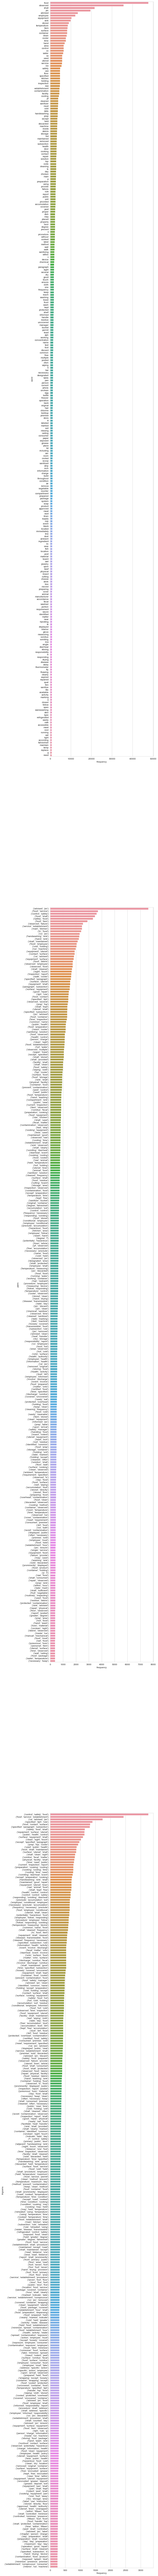

In [16]:
# join all the strings together
df = pd.read_pickle('entity_aggregation.pkl')
temp = []
for c in df['lifetime_comments']:
    temp.append(c)
joined = ' '.join(temp)

# create subplot of the different data frames
def word_frequency(sentence):
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    #creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
    trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq,word_pairs,trigrams

data2, data3, data4 = word_frequency(joined)

fig, axes = plt.subplots(3,1,figsize=(8,200))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(300))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(300))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(300))

### Using the knowledge above construct some keyword lists indicative of what we wish to track

In [17]:
pests = ['dropping', 'droppings', 'pest', 'pests', 'insect', 'fly', 'rodent', 'infestation']
personnel = ['handwashing', 'hand drying', 'hand', 'phone', 'hair', 'glove', 'soap', 'jewelry']
temperature = ['temperature', 'temp', 'raw', 'hot', 'cold', 'time', 'holding', 'held', 'degree', 'fahrenheit', 'heat',
               'cooled', 'hour']
sanitation = ['surface', 'utensil', 'linen', 'encrusted', 'grime', 'dirt', 'deposit', 'grease', 'facility', 'repair',
              'equipment', 'sanitizer', 'machine', 'solution', 'accumulation', 'buildup', 'residue', 'chlorine',
              'dust', 'soil']
hazard = ['vomitus', 'fecal', 'toxic', 'diarrheal', 'expired', 'contamination', 'vomiting', 'disease',
          'transmissible', 'poisonous']

# For each of these categories, we will build a boolean
def is_in_list(x, keywords=None):
    return any([y in str(x['lifetime_comments']).lower() for y in keywords])

test_df['pests'] = test_df.apply(is_in_list, axis=1, raw=False, result_type=None, args=(), keywords=pests)
test_df['personnel'] = test_df.apply(is_in_list, axis=1, raw=False, result_type=None, args=(), keywords=personnel)
test_df['temperature'] = test_df.apply(is_in_list, axis=1, raw=False, result_type=None, args=(), keywords=temperature)
test_df['sanitation'] = test_df.apply(is_in_list, axis=1, raw=False, result_type=None, args=(), keywords=sanitation)
test_df['hazard'] = test_df.apply(is_in_list, axis=1, raw=False, result_type=None, args=(), keywords=hazard)
test_df['any_flag'] = test_df.apply(lambda x: (x['pests'] | x['personnel'] | x['temperature'] | x['sanitation'] |
                                               x['hazard']), axis=1)

/tmp/ipykernel_933096/2979340984.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['pests'] = test_df.apply(is_in_list, axis=1, raw=False, result_type=None, args=(), keywords=pests)
/tmp/ipykernel_933096/2979340984.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['personnel'] = test_df.apply(is_in_list, axis=1, raw=False, result_type=None, args=(), keywords=personnel)
/tmp/ipykernel_933096/2979340984.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [ ]:
# Save the Pickle
test_df.to_pickle('final_dataset_w_yelp.pkl')

In [19]:
test_df

,dph_id,yelp_id,rating,review_count,img_url,yelp_name,price,violations,years_data,lifetime_count,...,lat,lng,place_id,types,pests,personnel,temperature,sanitation,hazard,any_flag
0,MTIzMDIzODE=,u_irrlZiHMa7ueeUHqHtvA,2.5,26,https://s3-media4.fl.yelpcdn.com/bphoto/xcsf4Y...,The Spot Sports Bar And Grill,0,"[6-1B, 12B, 13A, 18, 4-2B, 4-2B, 6-1A, 6-1B, 1...",2.276712,15,...,33.679683,-84.225939,ChIJ_VJqwyCr9YgRqi3SpD0y_D4,[premise],True,True,True,True,False,True
1,MTIzMDI4MTI=,39r2fM5P8heVXlLgYkmSaA,1.5,28,https://s3-media4.fl.yelpcdn.com/bphoto/eqdMzy...,Checkers,1,"[2-2D, 2-2D, 4-2B, 6-1A, 15A, 15C, 17C, 18, 18...",2.027397,29,...,33.802508,-84.194184,ChIJI1XSV9Co9YgRTaCjP9meAGU,"[establishment, food, point_of_interest, resta...",True,True,True,True,True,True
2,MTI3NzEzMjA=,QjL9fgvhsJta7SSX7P8YMw,3.5,20,https://s3-media4.fl.yelpcdn.com/bphoto/H9KSBt...,Woody's Cheesesteaks,0,"[2-2D, 2-2D, 11A, 18, 6-1A, 14B]",1.276712,6,...,33.740018,-84.346687,ChIJf_mTH24B9YgRakzoS_Ul8PY,"[establishment, food, point_of_interest, resta...",True,True,True,True,False,True
4,MTI3NzIwOTA=,lhxEztxsao9WfyfWuSpJfw,4.0,23,https://s3-media1.fl.yelpcdn.com/bphoto/vWOLn5...,Waffle Bar,0,"[2-2E, 8-2B, 17D]",1.276712,3,...,33.740018,-84.346687,ChIJK9uF2ncB9YgR9OYM7wwSMhM,"[establishment, food, point_of_interest, resta...",False,True,False,True,True,True
7,MTIzMDE5MjU=,2g6Dh5GqVQR-GWvo7unjBA,4.0,104,https://s3-media3.fl.yelpcdn.com/bphoto/AnkA3q...,Playa Bowls,2,"[12B, 2-2D, 4-2B, 8-2B, 13A, 2-2D, 4-2B, 12C]",2.413699,8,...,33.888524,-84.314891,EjI1MDcwIFBlYWNodHJlZSBCbHZkIGIgMTA1LCBDaGFtYm...,[subpremise],False,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385,ODgyNTg2,Kcva2t7e6Ukpb5vMvkdc2w,4.0,524,https://s3-media3.fl.yelpcdn.com/bphoto/8A3xoj...,La Fonda Latina,2,"[2-2D, 4-2A, 6-2, 12A, 14C]",0.000000,5,...,33.773510,-84.357108,ChIJ5bL8KxwE9YgREJo0_kc5rOc,"[establishment, food, point_of_interest, resta...",False,True,True,False,True,True
4387,OTQ4NDkzOQ==,g0KkQmGXCtxkzHWoYEQa4A,4.5,203,https://s3-media2.fl.yelpcdn.com/bphoto/ZXKglF...,Rina,2,"[2-2B, 6-2, 6-2, 14A]",0.000000,4,...,33.772659,-84.364304,ChIJf4qwAK4F9YgRVupJKoORNMc,"[establishment, food, point_of_interest, resta...",False,False,True,True,False,True
4388,ODg2NDA0,RE8bmfnqfcYEpbUHo3dYVQ,3.0,10,https://s3-media3.fl.yelpcdn.com/bphoto/U-CJhb...,Church's Chicken,1,"[4-2B, 6-1B, 15C, 17C, 18]",0.000000,5,...,33.772831,-84.415690,ChIJzaE75HAb9YgRBRlaqDNx2lM,"[establishment, food, point_of_interest, resta...",False,False,True,True,False,True
4389,Nzk1NjQzMw==,t4M0yOSVLz59H7JQi3FUSQ,3.5,12,https://s3-media2.fl.yelpcdn.com/bphoto/YgKepQ...,Boston Fish Supreme,1,"[2-2D, 11C, 17D]",0.000000,3,...,33.746267,-84.405973,ChIJ59NmO3AD9YgRJsL3BTxHUVk,"[establishment, food, point_of_interest, resta...",False,True,True,False,True,True
